<a href="https://colab.research.google.com/github/swathi-ganesula/Machine-Learning/blob/main/irisDTmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA PREPROCESSING

DATASET:iris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfiris=sns.load_dataset("iris")

In [ ]:
dfiris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
dfiris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
dfiris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
dfiris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

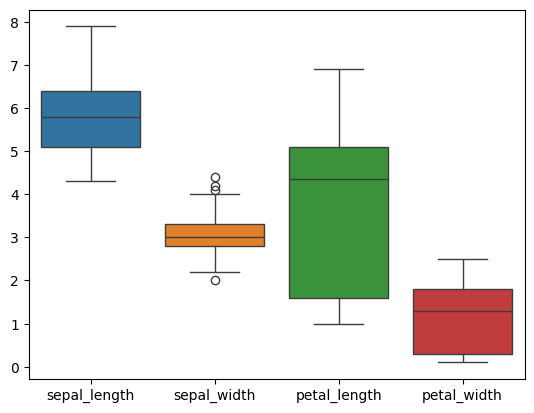

In [ ]:
sns.boxplot(dfiris)

<Axes: ylabel='sepal_width'>

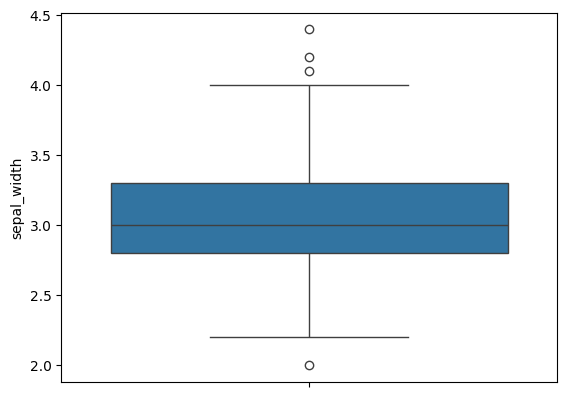

In [ ]:
sns.boxplot(dfiris["sepal_width"])

In [ ]:
dfiris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
q1=dfiris["sepal_width"].quantile(0.25)

In [ ]:
q1

np.float64(2.8)

In [ ]:
q3=dfiris["sepal_width"].quantile(0.75)

In [ ]:
q3

np.float64(3.3)

In [ ]:
iqr=q3-q1

In [ ]:
iqr

np.float64(0.5)

In [ ]:
lowerlimit=q1-(1.5*iqr)

In [ ]:
lowerlimit

np.float64(2.05)

In [ ]:
upperlimit=q3+(1.5*iqr)

In [ ]:
upperlimit

np.float64(4.05)

In [ ]:
dfiris["sepal_width"]<lowerlimit

,sepal_width
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [ ]:
dfiris["sepal_width"]>upperlimit

,sepal_width
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [ ]:
dfiris[(dfiris["sepal_width"]<lowerlimit)  |  (dfiris["sepal_width"]>upperlimit)]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [ ]:
dfiris["sepal_width"].map(lambda x: lowerlimit if x <lowerlimit else upperlimit if x>upperlimit else x)

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [ ]:
dfiris["sepal_width"]=dfiris["sepal_width"].map(lambda x: lowerlimit if x <lowerlimit else upperlimit if x>upperlimit else x)

<Axes: ylabel='sepal_width'>

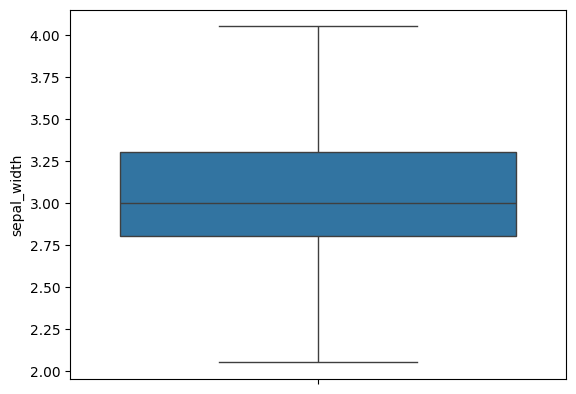

In [ ]:
sns.boxplot(dfiris["sepal_width"])

#when dependent column is categorical(Species) we need to convert it into numerical(numbers(0,1))

In [ ]:
dfiris["species"]

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label=LabelEncoder()

In [ ]:
label

LabelEncoder()

In [ ]:
label.fit(dfiris["species"])

LabelEncoder()

In [ ]:
label.transform(dfiris["species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
label.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
dfiris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
ary=label.transform(dfiris["species"])

In [ ]:
ary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dfiris[["species"]]

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


Data Seperation

In [ ]:
X=dfiris.drop("species",axis=1)

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=dfiris["species"]

In [ ]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [ ]:
y.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


<Axes: xlabel='species'>

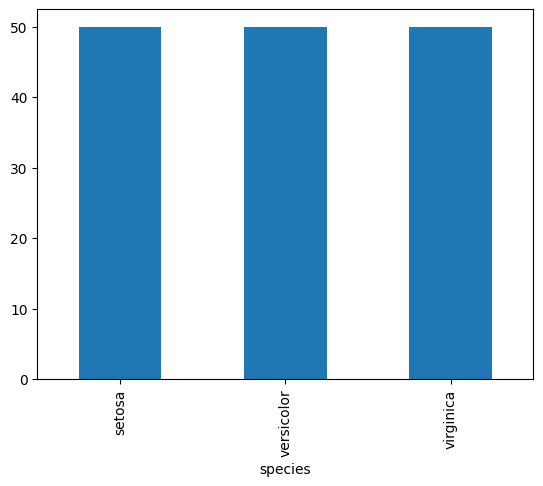

In [ ]:
y.value_counts().plot(kind="bar")

Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
y_train.shape

(120,)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
y_test.shape

(30,)

MODEL BUILDING

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier()

In [ ]:
dt_model

DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_model.score(X_test,y_test)

0.9666666666666667

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica
